In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


In [2]:
X=np.load('feature.npy')
y=np.load('target.npy')

In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [5]:
model_params = {
    'svm': {
        'model': SVC(probability=True),
        'params' : {
            'svc__gamma' : ['scale', 'auto'],
            'svc__C': [1,10,50,100],
            'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
        }  
    },
     'random_forest': {
         'model': RandomForestClassifier(),
         'params' : {
             'randomforestclassifier__n_estimators': [1,10,50,100],
             'randomforestclassifier__max_depth':  [1,5,10,20]
         }
        
     },
     'logistic_regression' : {
         'model': LogisticRegression(),
         'params': {
             'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'logisticregression__C': [1,10,50,100]
         }
     }
}

In [6]:

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], return_train_score=False,n_jobs=8,verbose=3)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\Leo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Leo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Leo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Leo\AppData\Local\Programs\Python\Python310\lib\site-pack

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Leo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,model,best_score,best_params
0,svm,0.857218,"{'svc__C': 10, 'svc__gamma': 'scale', 'svc__ke..."
1,random_forest,0.831253,"{'randomforestclassifier__max_depth': 20, 'ran..."
2,logistic_regression,0.844368,"{'logisticregression__C': 50, 'logisticregress..."


In [7]:
print('SVM performance on test:',best_estimators['svm'].score(X_test,y_test))
print('SVM performance on train:',best_estimators['svm'].score(X_train,y_train))

SVM performance on test: 0.8717948717948718
SVM performance on train: 1.0


In [8]:
best_clf = best_estimators['svm']
best_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, probability=True))])

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[26,  4],
       [ 6, 42]], dtype=int64)

Text(69.0, 0.5, 'Truth')

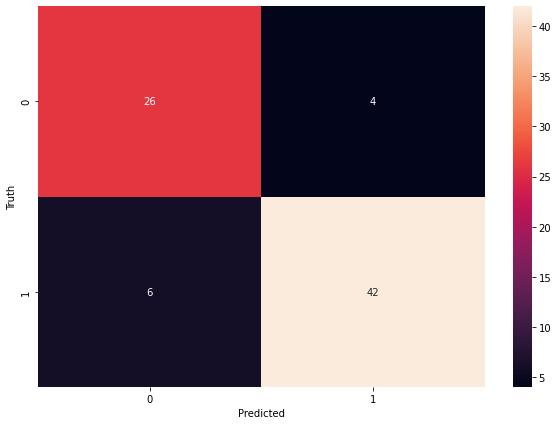

In [10]:
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [11]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, best_clf.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        30
           1       0.91      0.88      0.89        48

    accuracy                           0.87        78
   macro avg       0.86      0.87      0.87        78
weighted avg       0.87      0.87      0.87        78



In [12]:
best_clf.predict(X_test[0].reshape(1,-1))

array([0])

In [13]:
y_test[0]

0

In [14]:
a=best_clf.predict_proba(X_test[0].reshape(1,-1))[0][1]

In [15]:
a

0.06670691590719337

In [16]:
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(best_clf,files)

In [17]:
import pickle
with open('model_pkl' , 'rb') as f:
    model = pickle.load(f)

In [18]:
model.predict(X_test[0].reshape(1,-1))

array([0])